# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.103474e+01     7.656046e+00
 * time: 0.003484010696411133
     1     2.804329e+01     4.372012e+00
 * time: 0.015527009963989258
     2     1.859898e+01     4.413298e+00
 * time: 0.030906200408935547
     3     1.246857e+01     3.180108e+00
 * time: 0.046244144439697266
     4     1.139710e+01     3.162376e+00
 * time: 0.05882406234741211
     5     1.050643e+01     2.141598e+00
 * time: 0.0712740421295166
     6     9.500325e+00     1.206325e+00
 * time: 0.08354902267456055
     7     8.727075e+00     1.169192e+00
 * time: 0.09582400321960449
     8     8.334007e+00     6.526880e-01
 * time: 0.10806608200073242
     9     8.312150e+00     1.127251e+00
 * time: 0.11798715591430664
    10     8.273619e+00     7.439034e-01
 * time: 0.12790608406066895
    11     8.240426e+00     6.832379e-01
 * time: 0.1378040313720703
    12     8.158288e+00     4.767319e-01
 * time: 0.14774107933044434
    13     8.087735e+00     4.635163e-01
 * tim

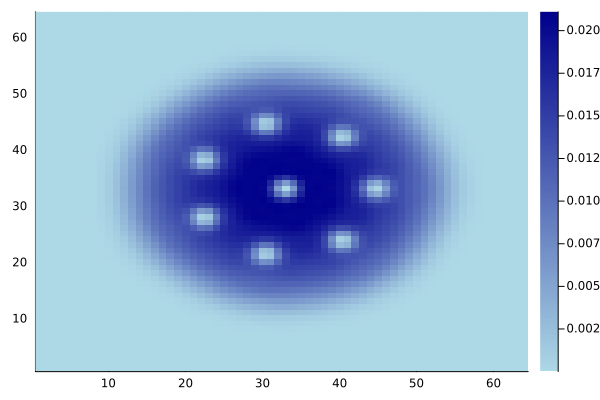

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)